<a href="https://colab.research.google.com/github/kvakhil/Machine-Learning-CS-545/blob/main/Polynomial_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1.4: Polynomial Model

* *Version 1.4: Added division by `n_samples` in gradient expression. Also inserted the transpose back in to the math expression just before the def polynomial_model line.*
* *Version 1.3: Changed 'linear model' to 'polynomial model' when referring to what to plot.*
* *Version 1.2: The mathematical expression just before `polynomial_gradient(X, T, W):` incorrectly had the transpose of the matrix of powers of X.  The transpose has been removed from this most recent version.*
* *Version 1.1: Added all details, including grading script.  Also removed the sentence the steps for defining and plotting X and T for the air quality experiments being different from lecture.  It is not different from what was done in lecture.*

*AKHIL KAKUMANU*

In this first assignment, you will write and apply python code that performs gradient descent to fit a polynomial model to the air quality data discussed in the lecture during the first week.  

Write code to implement a polynomial that returns the result

$$f(x) = w_0 + w_1 x + w_2 x^2 + \cdots + w_{p-1} x^{p-1}$$

Name this function `polynomial_model` that is called with two arguments, a column matrix of input values with number of rows equal to the number of samples, and a column matrix of weights with the number of rows equal to the number of powers $p$ to use. Notice that the first term on the right-hand side is actually $w_0 x^0$.

* `polynomial_model(X, W)`:
    * Given
        * `X`, an n_samples x 1 numpy array of input samples
        * `W`, an n_powers x 1 numpy array of weight values
    * Return
        * an n_samples x 1 numpy array of the model's predicted outputs for each sample in `X`.

polynomial_model([1,2,3],[1])

Now implement the gradient of the mean-squared-error between the target values in `T` and the model's output, with respect to the weights, `W`.

$$ \begin{align*}
\nabla_W E
&= \nabla_Y E \; \nabla_W Y\\
&= -2 (T - Y) \; \nabla_W Y\\
&= -2 (T - Y) \; [1,\; x,\; x^2,\; x^3,\; \ldots,\; x^{p-1}]
\end{align*}$$

for one sample $x$.  With $X$ being a matrix of multiples samples, one per row, we must modify the equation to this. Notice the transpose of the matrix of powers of $X$.  <font color=red>The following expression is now divided by `n_samples`.</font>

$$\nabla_W E = [1,\; X,\; X^2,\; X^3,\; \ldots,\; X^{p-1}]^T \;(-2)\; (T - Y) \;/\; \text{n_samples}$$
\;
* `polynomial_gradient(X, T, W)`:
   * Given
       * `X`, an n_samples x 1 numpy array of input samples
       * `T`, an n_samples x 1 numpy array of correct outputs (targets) for each input sample
       * `W`, an n_powers x 1 numpy array of weight values
    * Return
       * an n_powers x 1 numpy array of the gradient of the mean squared error with respect to each weight. (Same shape is W.)

Download the air quality data and prepare the `X` and `T` matrices as shown in the following code cells. Plot `CO(GT)` air quality (on the y axis) versus the hour of the day (on the x axis) to verify you have prepared the data correctly.

Use the `gradient_descent_adam` function defined in the lecture notes to find the best weights for the polynomial model, as illustrated in lecture.  Plot the RMSE versus iterations, plot the weights versus the number of steps, and plot the air quality versus hour of the day again and superimpose the polynomial model on the same graph.

## Simple Test of your Code

Let's copy and paste two of the functions used in lecture for use here.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas

In [ ]:
def gradient_descent_adam(model_f, gradient_f, rmse_f, X, T, W, rho, nSteps):
    # Commonly used parameter values
    alpha = rho
    beta1 = 0.9
    beta2 = 0.999
    epsilon = 1e-8
    m = 0
    v = 0
    
    error_sequence = []
    W_sequence = []
    for step in range(nSteps):
        error_sequence.append(rmse_f(model_f, X, T, W))
        W_sequence.append(W.flatten())
        
        g = gradient_f(X, T, W)
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * g * g
        mhat = m / (1 - beta1 ** (step+1))
        vhat = v / (1 - beta2 ** (step+1))
        W -= alpha * mhat / (np.sqrt(vhat) + epsilon)
        
    return W, error_sequence, W_sequence


def rmse(model, X, T, W):
    return np.sqrt(np.mean(  (T - model(X, W)) **2 )  )

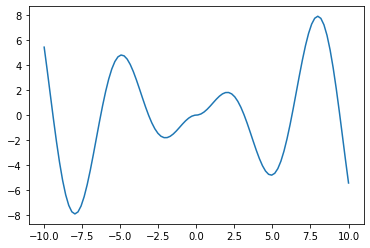

In [ ]:
X = np.linspace(-10, 10, 100).reshape(-1, 1)
T = np.sin(X) * np.abs(X)
plt.plot(X, T);

In [ ]:
def polynomial_model(X,W):
    
    T=[]
    pow=0
    x=0
    for i in X:
        for j in W:
            x=x+j*(i**pow)
            pow=pow+1
            
        T.append(x[0])
        x=0
        pow=0
    return np.array(T).reshape(-1,1)



In [ ]:
y=polynomial_model(np.linspace(-10, 10, 100).reshape(-1, 1),np.ones((5, 1)))
y

array([[9.09100000e+03],
       [8.36267073e+03],
       [7.67904296e+03],
       [7.03824736e+03],
       [6.43845457e+03],
       [5.87787518e+03],
       [5.35475980e+03],
       [4.86739897e+03],
       [4.41412324e+03],
       [3.99330312e+03],
       [3.60334910e+03],
       [3.24271163e+03],
       [2.90988116e+03],
       [2.60338809e+03],
       [2.32180282e+03],
       [2.06373570e+03],
       [1.82783709e+03],
       [1.61279728e+03],
       [1.41734656e+03],
       [1.24025521e+03],
       [1.08033345e+03],
       [9.36431509e+02],
       [8.07439567e+02],
       [6.92287792e+02],
       [5.89946321e+02],
       [4.99425270e+02],
       [4.19774729e+02],
       [3.50084762e+02],
       [2.89485409e+02],
       [2.37146687e+02],
       [1.92278584e+02],
       [1.54131068e+02],
       [1.21994078e+02],
       [9.51975309e+01],
       [7.31113177e+01],
       [5.51453050e+01],
       [4.07493341e+01],
       [2.94132218e+01],
       [2.06667601e+01],
       [1.40797161e+01],


In [ ]:
def polynomial_gradient(X, T, W):
    nonlinear_part = X**2
    linear_part = np.insert(X, 0, 1, axis=1)
    pow=3
    for _ in range(len(W)-3):
        nonlinear_part=np.hstack((nonlinear_part,X**pow))
#         print(pow)
        pow=pow+1
    y=polynomial_model(X,W)
    return np.hstack((linear_part, nonlinear_part)).T@((-2)*((T-y)/X.shape[0]))
#     return linear_part
    

In [ ]:
polynomial_gradient(np.linspace(-10, 10, 100).reshape(-1, 1),np.sin(X) * np.abs(X),np.ones((5, 1)))

array([[4.23270696e+03],
       [4.21812787e+03],
       [3.07491835e+05],
       [3.06474022e+05],
       [2.43612805e+07]])

In [ ]:
n_powers = 4
W = np.zeros((5, 1))  # Initial weights
X = np.linspace(-10, 10, 100).reshape(-1, 1)             
rho = 0.01  # learning rate
n_steps = 100  # number of updates to W

W, error_sequence, W_sequence = gradient_descent_adam(polynomial_model, 
                                                      polynomial_gradient, 
                                                      rmse,
                                                      X, T, W, 
                                                      rho, n_steps)

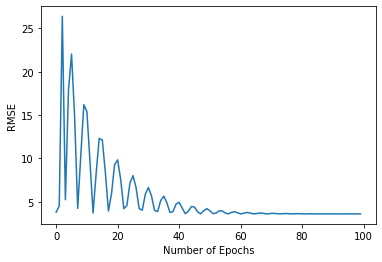

In [ ]:
plt.plot(error_sequence)
plt.xlabel('Number of Epochs')
plt.ylabel('RMSE');

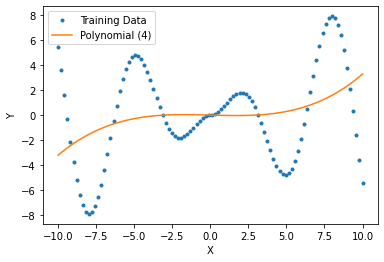

In [ ]:
plt.plot(X, T, '.', label='Training Data')
plt.plot(X, polynomial_model(X, W), label=f'Polynomial ({n_powers})')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend();

# Air Quality Data

Download the air quality data and prepare the `X` and `T` matrices as shown in the following code cells.  When done correctly, `X` and `T` should both have shape `(827, 1)`.  Plot `CO(GT)` air quality (on the y axis) versus the hour of the day (on the x axis) to verify you have prepared the data correctly.

Use the `gradient_descent_adam` function defined in the lecture notes to find the best weights for the polynomial model, as illustrated in lecture.  Plot the RMSE versus iterations, plot the weights versus the number of steps, and plot the air quality versus hour of the day again and superimpose the polynomial model on the same graph.

Now apply the Adam optimization function to fit a polynomial to this data.  Try several different values of `n_powers` and `n_steps`.  Plot the results and describe what you see.

In [ ]:
data = pandas.read_csv('AirQualityUCI.csv', delimiter=';', decimal=',', usecols=range(15), na_values=-200)
data = data.dropna(axis=0)
# data.shape

In [ ]:
hour = [int(t[:2]) for t in data['Time']]
CO = data['CO(GT)']
T=CO
T = np.array(T).reshape((-1, 1))  # make T have one column and as many rows as needed to hold the values of T
Tnames = ['CO']
X = np.array(hour).reshape((-1, 1))
Xnames = ['Hour']

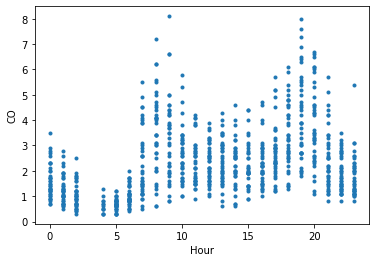

In [ ]:
plt.plot(X, T, '.')
plt.xlabel(Xnames[0])
plt.ylabel(Tnames[0]); 

In [ ]:
n_powers = 4
W = np.zeros((n_powers, 1))  # Initial weights
# X = np.linspace(-10, 10, 100).reshape(-1, 1)             
rho = 0.01  # learning rate
n_steps = 100 # number of updates to W

W, error_sequence, W_sequence = gradient_descent_adam(polynomial_model, 
                                                      polynomial_gradient, 
                                                      rmse,
                                                      X, T, W, 
                                                      rho, n_steps)

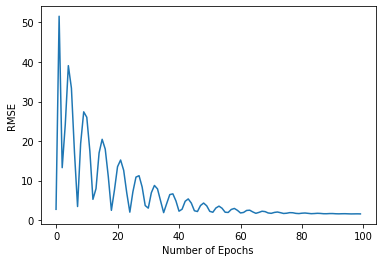

In [ ]:
plt.plot(error_sequence)
plt.xlabel('Number of Epochs')
plt.ylabel('RMSE');

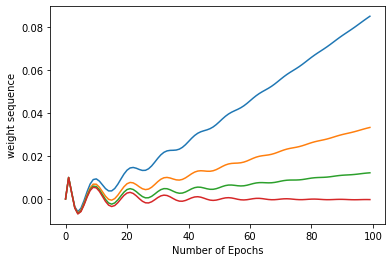

In [ ]:
plt.plot(W_sequence)
plt.xlabel('Number of Epochs')
plt.ylabel('weight sequence');

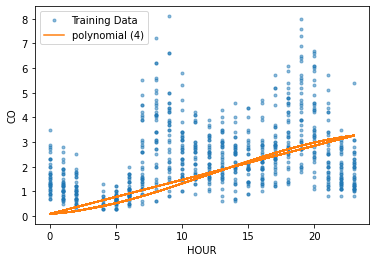

In [ ]:
plt.plot(X,T,'.', label='Training Data',alpha=0.5)
plt.plot(X, polynomial_model(X,W),label=f'polynomial ({n_powers})')
plt.xlabel('HOUR')
plt.ylabel('CO')
plt.legend();

We can see in the RMSE curve that the error is decreasing gradually with every step. initially,the decrease in the error is significant but the as the number of steps increase, the rate at which the error decreases is reduced. Towards the end of curve, the error reaches a constant value which signifies the weights have converged.

model predictions on top of data:
When we plot the model predictions on the data we can see that the curve is passing through greater number of data points compared to a linear model. Moreover, if we se the alpha value to 0.5 and plot the same graph, we can see that the curve or the model is passing through the denser points in the graph.

In [ ]:
n_powers = 8
W = np.zeros((n_powers, 1))  # Initial weights
# X = np.linspace(-10, 10, 100).reshape(-1, 1)             
rho = 0.01  # learning rate
n_steps = 100  # number of updates to W

W, error_sequence, W_sequence = gradient_descent_adam(polynomial_model, 
                                                      polynomial_gradient, 
                                                      rmse,
                                                      X, T, W, 
                                                      rho, n_steps)

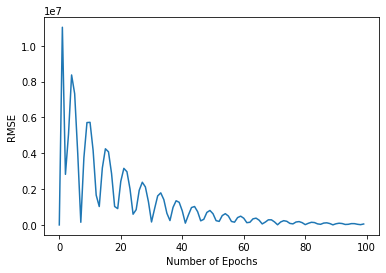

In [ ]:
plt.plot(error_sequence)
plt.xlabel('Number of Epochs')
plt.ylabel('RMSE');

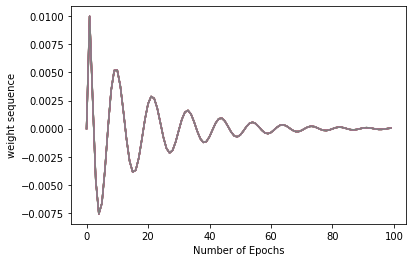

In [ ]:
plt.plot(W_sequence)
plt.xlabel('Number of Epochs')
plt.ylabel('weight sequence');

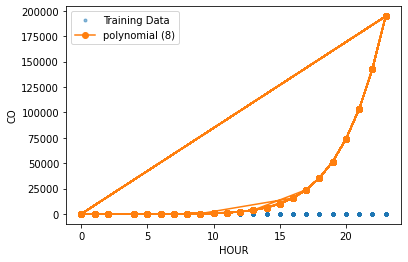

In [ ]:
plt.plot(X,T,'.', label='Training Data',alpha=0.5)
plt.plot(X, polynomial_model(X,W),'-o',label=f'polynomial ({n_powers})')
plt.xlabel('HOUR')
plt.ylabel('CO')
plt.legend();

In [ ]:
n_powers = 8
W = np.zeros((n_powers, 1))  # Initial weights
# X = np.linspace(-10, 10, 100).reshape(-1, 1)             
rho = 0.01  # learning rate
n_steps = 1000  # number of updates to W

W, error_sequence, W_sequence = gradient_descent_adam(polynomial_model, 
                                                      polynomial_gradient, 
                                                      rmse,
                                                      X, T, W, 
                                                      rho, n_steps)

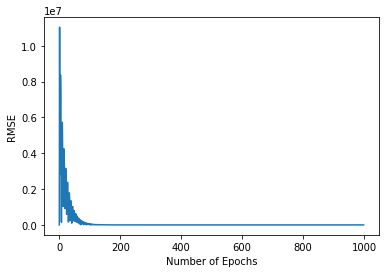

In [ ]:
plt.plot(error_sequence)
plt.xlabel('Number of Epochs')
plt.ylabel('RMSE');

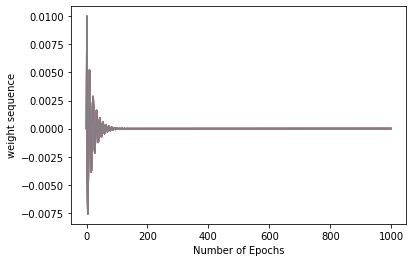

In [ ]:
plt.plot(W_sequence)
plt.xlabel('Number of Epochs')
plt.ylabel('weight sequence');

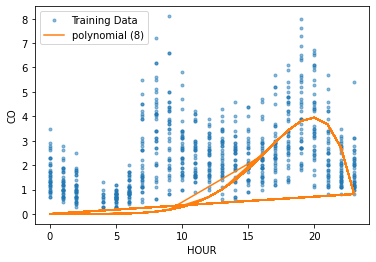

In [ ]:
plt.plot(X,T,'.', label='Training Data',alpha=0.5)
plt.plot(X, polynomial_model(X,W),label=f'polynomial ({n_powers})')
plt.xlabel('HOUR')
plt.ylabel('CO')
plt.legend();

In [ ]:
n_powers = 4
W = np.zeros((n_powers, 1))  # Initial weights
# X = np.linspace(-10, 10, 100).reshape(-1, 1)             
rho = 0.01  # learning rate
n_steps = 50  # number of updates to W

W, error_sequence, W_sequence = gradient_descent_adam(polynomial_model, 
                                                      polynomial_gradient, 
                                                      rmse,
                                                      X, T, W, 
                                                      rho, n_steps)

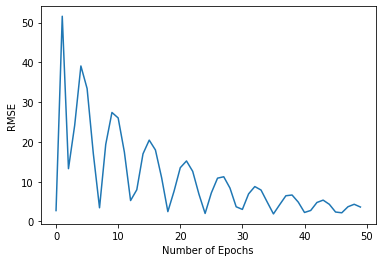

In [ ]:
plt.plot(error_sequence)
plt.xlabel('Number of Epochs')
plt.ylabel('RMSE');

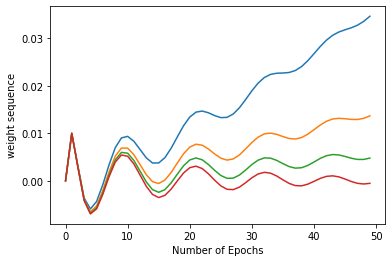

In [ ]:
plt.plot(W_sequence)
plt.xlabel('Number of Epochs')
plt.ylabel('weight sequence');

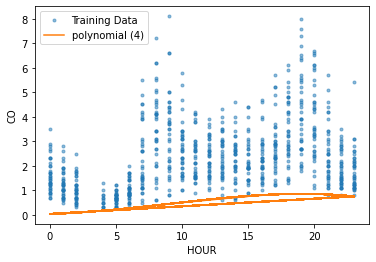

In [ ]:
plt.plot(X,T,'.', label='Training Data',alpha=0.5)
plt.plot(X, polynomial_model(X,W),label=f'polynomial ({n_powers})')
plt.xlabel('HOUR')
plt.ylabel('CO')
plt.legend();

In [ ]:
n_powers = 4
W = np.zeros((n_powers, 1))  # Initial weights
# X = np.linspace(-10, 10, 100).reshape(-1, 1)             
rho = 0.01  # learning rate
n_steps = 500  # number of updates to W

W, error_sequence, W_sequence = gradient_descent_adam(polynomial_model, 
                                                      polynomial_gradient, 
                                                      rmse,
                                                      X, T, W, 
                                                      rho, n_steps)

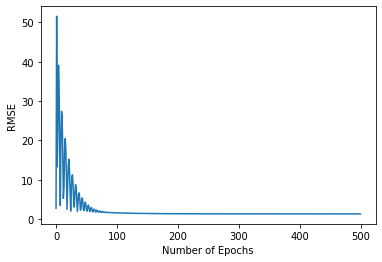

In [ ]:
plt.plot(error_sequence)
plt.xlabel('Number of Epochs')
plt.ylabel('RMSE');

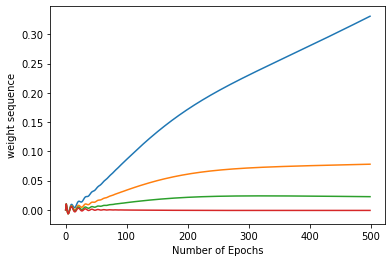

In [ ]:
plt.plot(W_sequence)
plt.xlabel('Number of Epochs')
plt.ylabel('weight sequence');

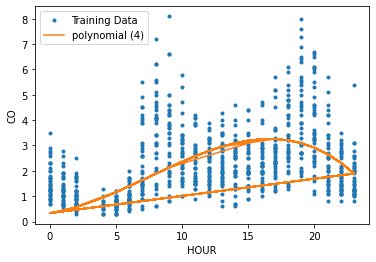

In [ ]:
plt.plot(X,T,'.', label='Training Data')
plt.plot(X, polynomial_model(X,W),label=f'polynomial ({n_powers})')
plt.xlabel('HOUR')
plt.ylabel('CO')
plt.legend();

In [ ]:
n_powers = 5
W = np.zeros((n_powers, 1))  # Initial weights
# X = np.linspace(-10, 10, 100).reshape(-1, 1)             
rho = 0.01  # learning rate
n_steps = 100  # number of updates to W

W, error_sequence, W_sequence = gradient_descent_adam(polynomial_model, 
                                                      polynomial_gradient, 
                                                      rmse,
                                                      X, T, W, 
                                                      rho, n_steps)

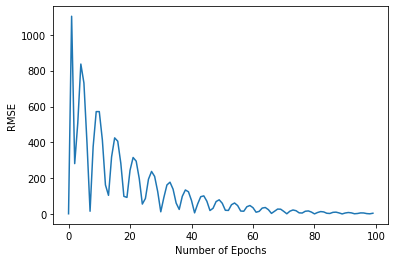

In [ ]:
plt.plot(error_sequence)
plt.xlabel('Number of Epochs')
plt.ylabel('RMSE');

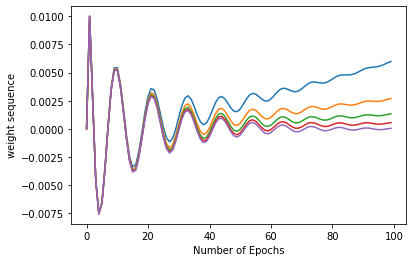

In [ ]:
plt.plot(W_sequence)
plt.xlabel('Number of Epochs')
plt.ylabel('weight sequence');

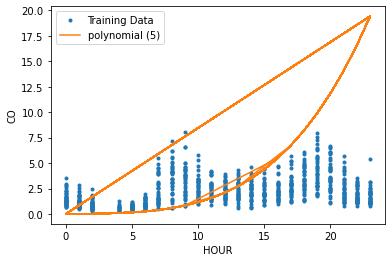

In [ ]:
plt.plot(X,T,'.', label='Training Data')
plt.plot(X, polynomial_model(X,W),label=f'polynomial ({n_powers})')
plt.xlabel('HOUR')
plt.ylabel('CO')
plt.legend();

In [ ]:
n_powers = 5
W = np.zeros((n_powers, 1))  # Initial weights
# X = np.linspace(-10, 10, 100).reshape(-1, 1)             
rho = 0.01  # learning rate
n_steps = 600  # number of updates to W

W, error_sequence, W_sequence = gradient_descent_adam(polynomial_model, 
                                                      polynomial_gradient, 
                                                      rmse,
                                                      X, T, W, 
                                                      rho, n_steps)

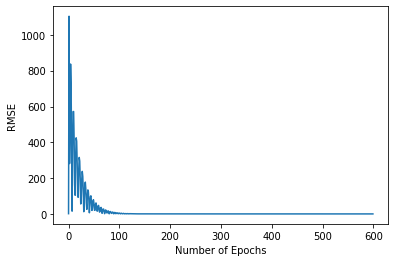

In [ ]:
plt.plot(error_sequence)
plt.xlabel('Number of Epochs')
plt.ylabel('RMSE');

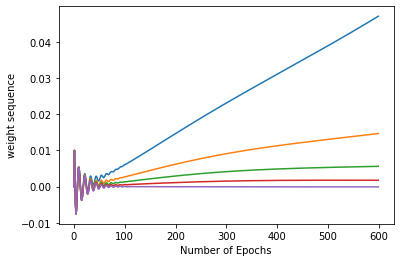

In [ ]:
plt.plot(W_sequence)
plt.xlabel('Number of Epochs')
plt.ylabel('weight sequence');

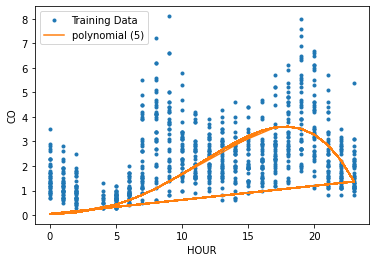

In [ ]:
plt.plot(X,T,'.', label='Training Data')
plt.plot(X, polynomial_model(X,W),label=f'polynomial ({n_powers})')
plt.xlabel('HOUR')
plt.ylabel('CO')
plt.legend();

As the n_powers increases, I observed that the error curve is taking slightly more number of steps to converge the weights.
Till n_powers is equal to 5, the model is approximately taking 100 steps to converge the weights, even at higher n_powers values
the models is taking less than 150 steps to converge the weights. I think this is because the error decreases significantly at the initial steps, no matter how big the value of n_powers is.

Decreasing the number of steps to below the minimum steps required for the weights to converge, results in a curve that does not pass through as many dense points as the best fit model.

For higher powers, I observed that the curve is going beyond the values of the data. But for the same n_powers value when I increase the number of steps, I can see that the curve is passing through more number of data points, which I thought was abnormal because when I checked the weights they are still converging at about 100 steps.



# Grading

Your notebook will be run and graded automatically. Test this grading process by first downloading [A1grader.tar](http://www.cs.colostate.edu/~anderson/cs545/notebooks/A1grader.tar) (to be provided soon) and extract `A1grader.py` from it. Run the code in the following cell to demonstrate an example grading session. You should see a perfect execution score of 60/60 if your functions are defined correctly. The remaining 40 points will be based on other testing and the results you obtain and your discussions. 

A different, but similar, grading script will be used to grade your checked-in notebook. It will include additional tests. You should design and perform additional tests on all of your functions to be sure they run correctly before checking in your notebook.  

For the grading script to run correctly, you must first name this notebook as 'Lastname-A1.ipynb' with 'Lastname' being your last name, and then save this notebook.

In [ ]:
%run -i A1grader.py

ERROR:root:File `'A1grader.py'` not found.


# Check-In

Do not include this section in your notebook.

Name your notebook ```Lastname-A1.ipynb```.  So, for me it would be ```Anderson-A1.ipynb```.  Submit the file using the ```Assignment 1``` link on [Canvas](https://colostate.instructure.com/courses/109894).

Grading will be based on 

  * correct behavior of the required functions listed above,
  * easy to understand plots in your notebook,
  * readability of the notebook,
  * effort in making interesting observations, and in formatting your notebook.